## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [19]:
df = pd.read_csv('QueryResults.csv')

# if we want to use our own column names
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [21]:
df.head()
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [22]:
(row,column) = df.shape
print(f"The file has {row} Rows and {column} Columns.")

The file has 1991 Rows and 3 Columns.


**Challenge**: Count the number of entries in each column of the dataframe

In [23]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [27]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [28]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [40]:
df['DATE'][1]
# OR
df.DATE[1]
type(df.DATE[1])

str

In [41]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))


2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [43]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [49]:
# to convert your DataFrame so that each category has its own column
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [50]:
reshaped_df.shape

(145, 14)

In [51]:
print(reshaped_df.head())
print(reshaped_df.tail())

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   85.0   511.0  164.0    14.0 NaN   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0 NaN  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0 NaN  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0 NaN   958.0       579.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  161.0   124.0  NaN   73.0    NaN  
2008-09-01  131.0  482.0   542.0  6.0  290.0    NaN  
2008-10-01  127.0  617.0   510.0  NaN  249.0    NaN  
2008-11-01   97.0  504.0   452.0  1.0  160.0    NaN  
TAG         assembly       c       c#     c++  delphi     go     java  \
DA

In [53]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [59]:
# to substitute the number 0 for each NaN value in the DataFrame, to not drop the rows that have a NaN value
reshaped_df.fillna(0, inplace=True)

# The inplace argument means that we are updating reshaped_df. Without this argument, 

# reshaped_df = reshaped_df.fillna(0) 

In [58]:
# Counting entries in each column
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [60]:
# To check for any NaN value
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [61]:
import matplotlib.pyplot as plt

In [77]:
# a couple of methods that will help us style our chart:
# .figure() - allows us to resize our chart
# .xticks() - configures our x-axis
# .yticks() - configures our y-axis
# .xlabel() - add text to the x-axis
# .ylabel() - add text to the y-axis
# .ylim() - allows us to set a lower and upper bound



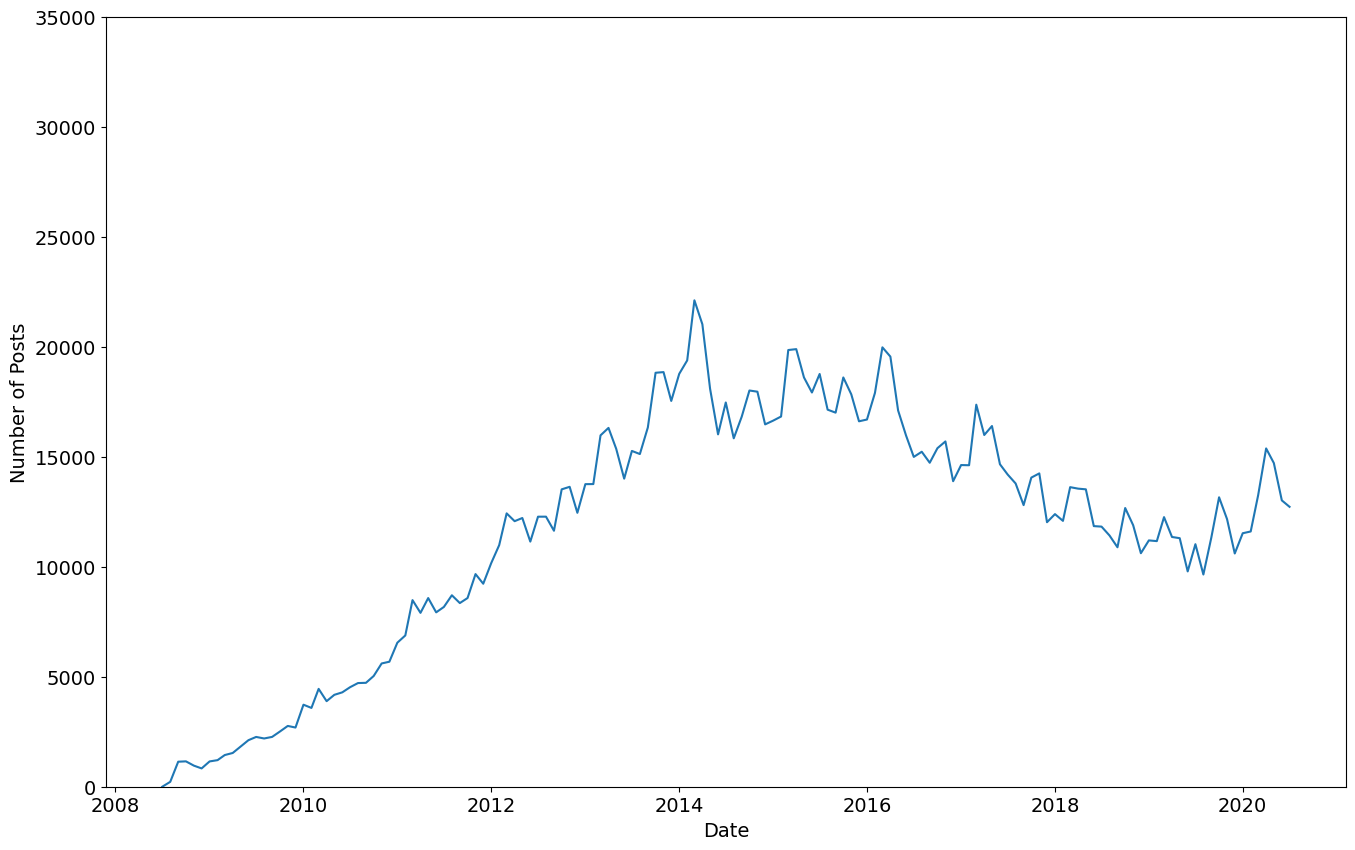

In [86]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

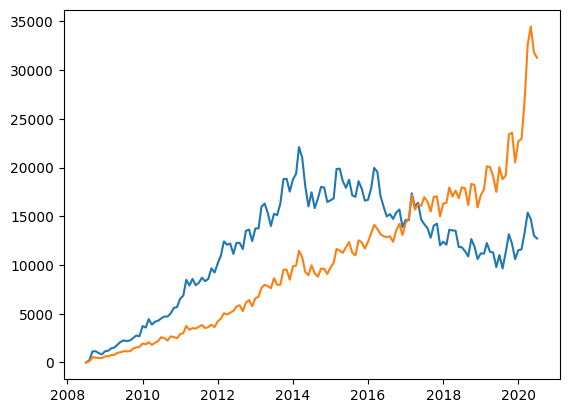

In [87]:
plt.plot(reshaped_df.index, reshaped_df.java)

plt.plot(reshaped_df.index, reshaped_df.python)

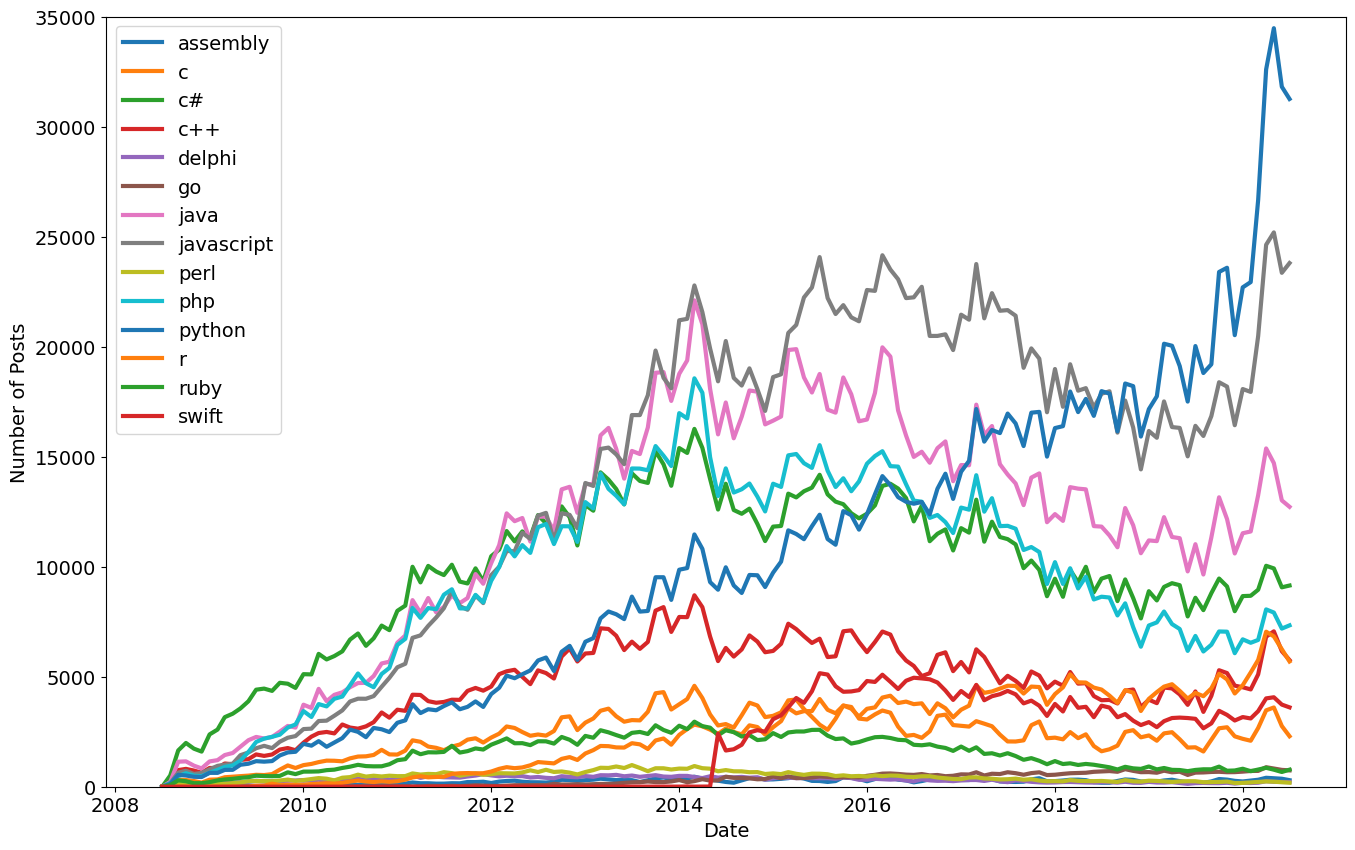

In [91]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# For plotting all of the columns

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=14)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [93]:
# Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes. This can sometimes make it difficult to see what's going on.

# A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations,
# we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

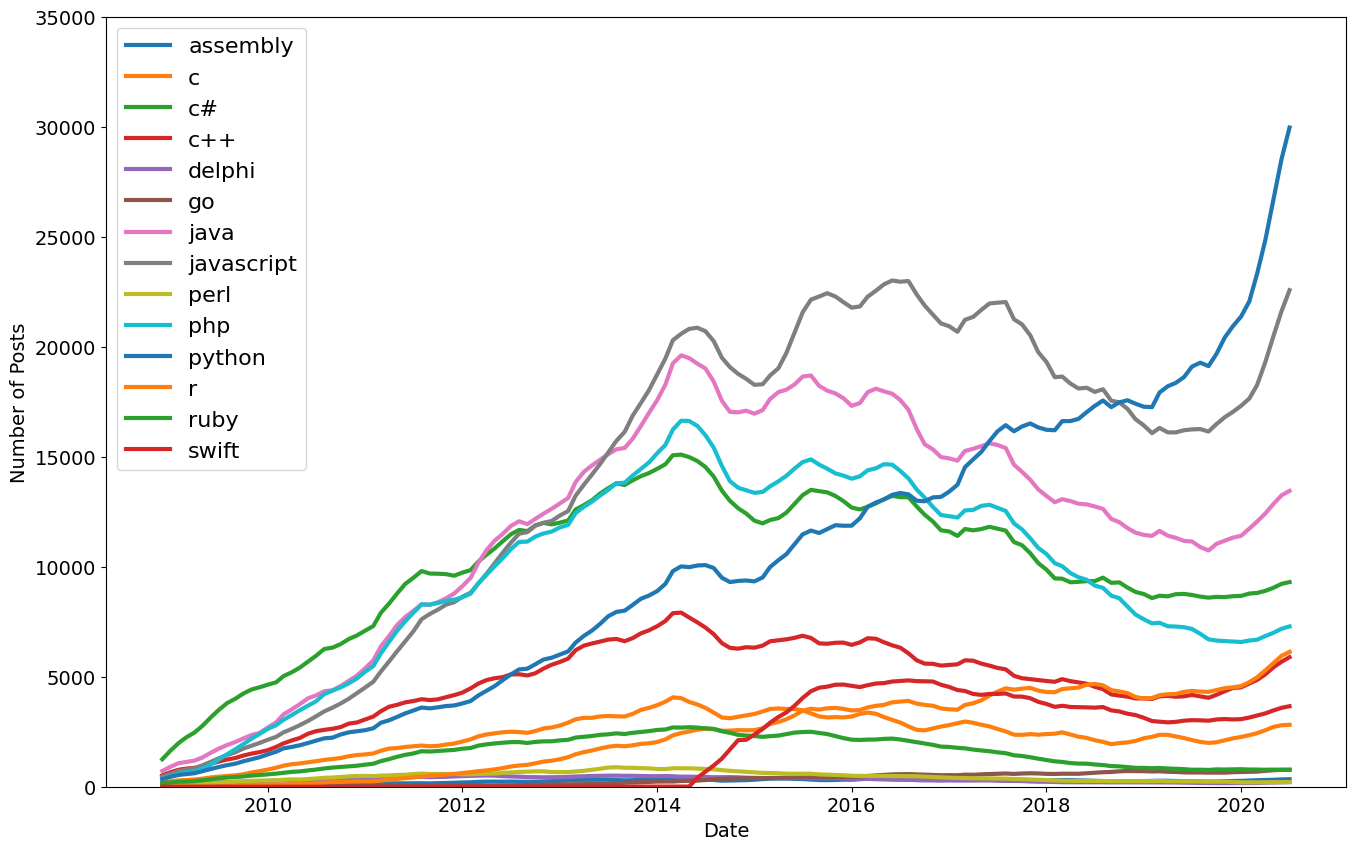

In [98]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()  # Take average of each 'window' defined entries i.e., 6
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

***Today's Learning:***

1. used .groupby() to explore the number of posts and entries per programming language

2. converted strings to Datetime objects with to_datetime() for easier plotting

3. reshaped our DataFrame by converting categories to columns using .pivot()

4. used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

5. created (multiple) line charts using .plot() with a for-loop

6. styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

7. added a legend to tell apart which line is which by colour

8. smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.